In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
#
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [2]:
mb=pd.read_excel("C:/Users/GHOST-V3/EMRE/Github için proje/RFM/Online Retail.xlsx")

In [3]:
mb.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
219621,556104,84828,JUNGLE POPSICLES ICE LOLLY MOULDS,12,2011-06-08 16:34:00,1.25,13875.0,United Kingdom
517354,580054,22596,CHRISTMAS STAR WISH LIST CHALKBOARD,2,2011-12-01 13:08:00,1.25,18122.0,United Kingdom
39187,539631,22379,RECYCLING BAG RETROSPOT,2,2010-12-20 15:03:00,4.21,NaN,United Kingdom
388068,570414,23415,HOME SWEET HOME HOOK,1,2011-10-10 13:17:00,1.65,17214.0,United Kingdom
312979,564430,23201,JUMBO BAG ALPHABET,20,2011-08-25 11:36:00,2.08,15955.0,United Kingdom
307803,563928,21976,PACK OF 60 MUSHROOM CAKE CASES,1,2011-08-21 15:17:00,0.55,17059.0,United Kingdom
290633,562389,20977,36 PENCILS TUBE WOODLAND,16,2011-08-04 15:55:00,1.25,16531.0,United Kingdom
133192,547729,84536B,FAIRY CAKES NOTEBOOK A7 SIZE,6,2011-03-25 10:52:00,0.42,15529.0,United Kingdom
340381,566625,20726,LUNCH BAG WOODLAND,10,2011-09-14 09:38:00,1.65,14911.0,EIRE
383935,570093,21034,REX CASH+CARRY JUMBO SHOPPER,1,2011-10-07 11:55:00,0.95,18096.0,United Kingdom


In [4]:
display(mb.describe())

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


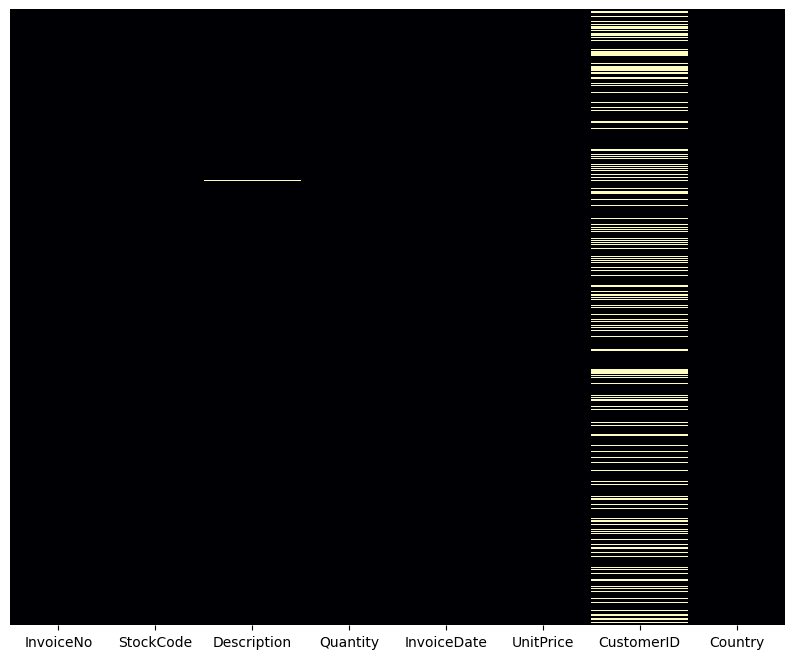

In [5]:
plt.subplots(figsize=(10, 8))
sns.heatmap(mb.isnull(), yticklabels = False, cbar = False, cmap = "magma")
plt.show()

In [6]:
mb.drop_duplicates(inplace=True)
mb = mb[(mb["Quantity"] > 0) & (mb["UnitPrice"] > 0) & (mb["CustomerID"].notnull())]

In [7]:
mb.shape

(392692, 8)

In [8]:
def get_month(x) : return dt.datetime(x.year,x.month,1)
mb['InvoiceMonth'] = mb['InvoiceDate'].apply(get_month)
grouping = mb.groupby('CustomerID')['InvoiceMonth']
mb['CohortMonth'] = grouping.transform('min')
mb.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01


In [9]:
def get_date_int(mb, column):
    year = mb[column].dt.year
    month = mb[column].dt.month
    day = mb[column].dt.day
    return year, month, day

In [10]:
invoice_year, invoice_month, invoice_day = get_date_int(mb, 'InvoiceMonth')
cohort_year, cohort_month, cohort_day = get_date_int(mb, 'CohortMonth')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

mb['CohortIndex'] = years_diff * 12 + months_diff + 1

mb.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5


In [11]:
grouping = mb.groupby(['CohortMonth', 'CohortIndex'])

cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()

cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns='CohortIndex',
                                 values='CustomerID')

In [12]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.index=retention.index.date

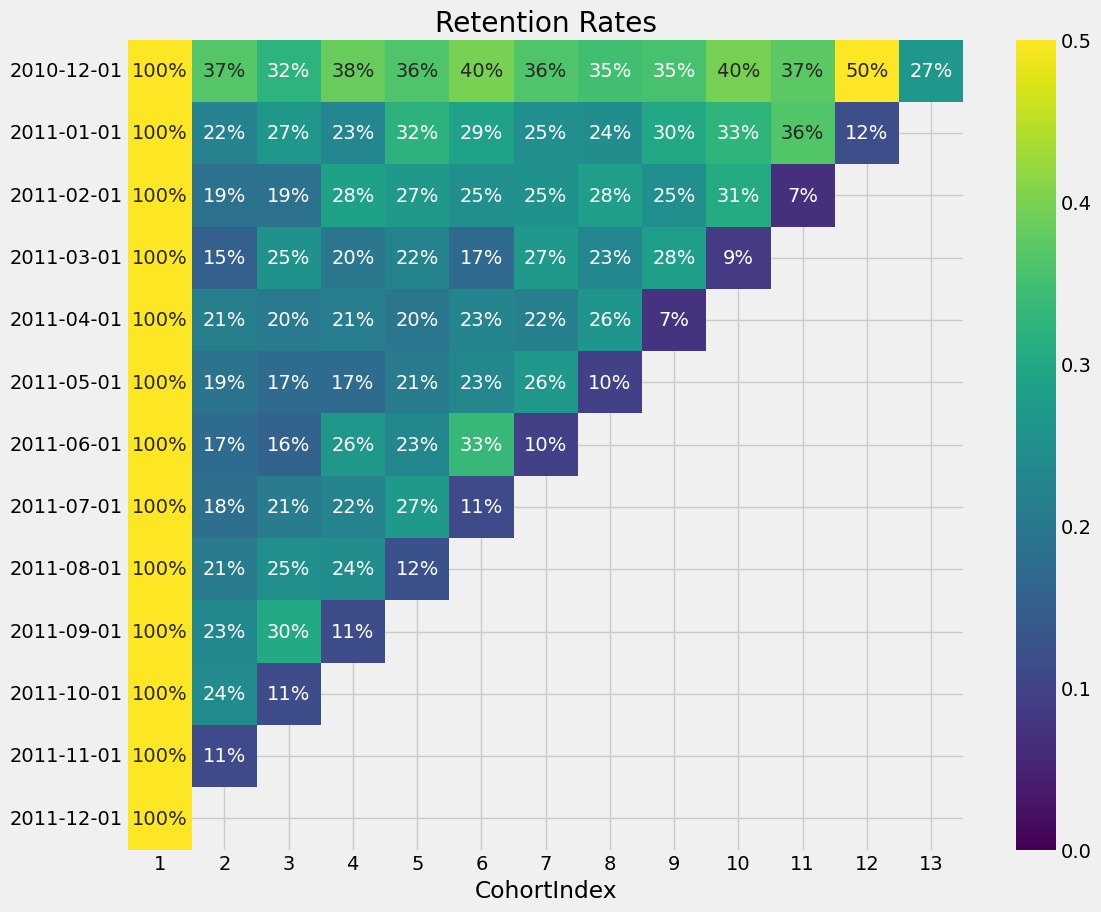

In [13]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 10))
plt.title('Retention Rates')

sns.heatmap(data=retention,
            annot=True,
            fmt='.0%',
            vmin=0.0,
            vmax=0.5,
            cmap='viridis') 
plt.show()

In [14]:
mb['InvoiceDay'] = mb['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, x.day))

act_date = max(mb['InvoiceDay'] + dt.timedelta(1))
mb['TotalSum'] = mb['Quantity'] * mb['UnitPrice']
mb.drop(['CohortMonth', 'InvoiceMonth', 'CohortIndex'], axis=1, inplace=True)
mb.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDay,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [15]:
rfm = mb.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x: (act_date - x.max()).days,
    'InvoiceNo' : 'count',
    'TotalSum' : 'sum'
})

rfm.rename(columns = {'InvoiceDate' : 'Recency', 
                      'InvoiceNo' : 'Frequency', 
                      'TotalSum' : 'MonetaryValue'}, inplace = True)
rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


In [16]:
r_labels = range(3, 0, -1)
r_groups = pd.qcut(rfm.Recency, q = 3, labels = r_labels)

f_labels = range(1, 4)
f_groups = pd.qcut(rfm.Frequency, q = 3, labels = f_labels)

m_labels = range(1, 4)
m_groups = pd.qcut(rfm.MonetaryValue, q = 3, labels = m_labels)

In [17]:
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values

rfm = rfm.assign(R=r_groups,F=f_groups,M=m_groups)

rfm['RFM_Segment'] = rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,3,1.01.03.0,5
12347.0,2,182,4310.00,3,3,3,3.03.03.0,9
12348.0,75,31,1797.24,2,2,3,2.02.03.0,7
12349.0,18,73,1757.55,3,3,3,3.03.03.0,9
12350.0,310,17,334.40,1,1,1,1.01.01.0,3


In [18]:
rfm_agg = rfm.groupby('RFM_Score').agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'MonetaryValue' : ['mean', 'count']
})

rfm_agg.rename(columns = {'mean' : 'Mean','count' : 'Count'},
               inplace = True)

rfm_agg.round(2).head()

Recency Frequency MonetaryValue      
             Mean      Mean          Mean Count
RFM_Score                                      
3          237.43     10.65        200.64   636
4          137.24     19.12        313.35   561
5          110.18     28.92        775.18   704
6           66.22     47.19        829.17   621
7           48.35     73.61       1625.29   558

In [19]:
score_labels = ['Bronze', 'Silver', 'Gold']
score_groups = pd.qcut(rfm.RFM_Score, q = 3, labels = score_labels)
rfm['Robust RFM Level'] = score_groups.values

rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Robust RFM Level
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,1,1,3,1.01.03.0,5,Bronze
12347.0,2,182,4310.00,3,3,3,3.03.03.0,9,Gold
12348.0,75,31,1797.24,2,2,3,2.02.03.0,7,Silver
12349.0,18,73,1757.55,3,3,3,3.03.03.0,9,Gold
12350.0,310,17,334.40,1,1,1,1.01.01.0,3,Bronze


In [20]:
rfm.describe()


,Recency,Frequency,MonetaryValue,RFM_Score
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,92.059474,90.523744,2048.688081,6.007838
std,100.012264,225.506968,8985.230220,2.021999
min,0.000000,1.000000,3.750000,3.000000
25%,17.000000,17.000000,306.482500,4.000000
50%,50.000000,41.000000,668.570000,6.000000
75%,141.750000,98.000000,1660.597500,8.000000
max,373.000000,7676.000000,280206.020000,9.000000


In [21]:
def neg_to_zero(x):
    if x <= 0:
        return 1
    else:
        return x
rfm['Recency'] = [neg_to_zero(x) for x in rfm.Recency]

rfm_log = rfm[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log, axis = 1)

In [22]:
scaler = StandardScaler()
scaler.fit(rfm_log)

rfm_normalized= scaler.transform(rfm_log)

In [23]:
rfm_scaled = pd.DataFrame(rfm_normalized, index = rfm.index, columns = rfm_log.columns)
rfm.describe()

,Recency,Frequency,MonetaryValue,RFM_Score
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,92.067543,90.523744,2048.688081,6.007838
std,100.004876,225.506968,8985.230220,2.021999
min,1.000000,1.000000,3.750000,3.000000
25%,17.000000,17.000000,306.482500,4.000000
50%,50.000000,41.000000,668.570000,6.000000
75%,141.750000,98.000000,1660.597500,8.000000
max,373.000000,7676.000000,280206.020000,9.000000


C:\Users\GHOST-V3\AppData\Local\Temp\ipykernel_80412\2718560963.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm[feature],  hist=True, color='#e74c3c', ax=ax[i][0])
C:\Users\GHOST-V3\AppData\Local\Temp\ipykernel_80412\2718560963.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_scal

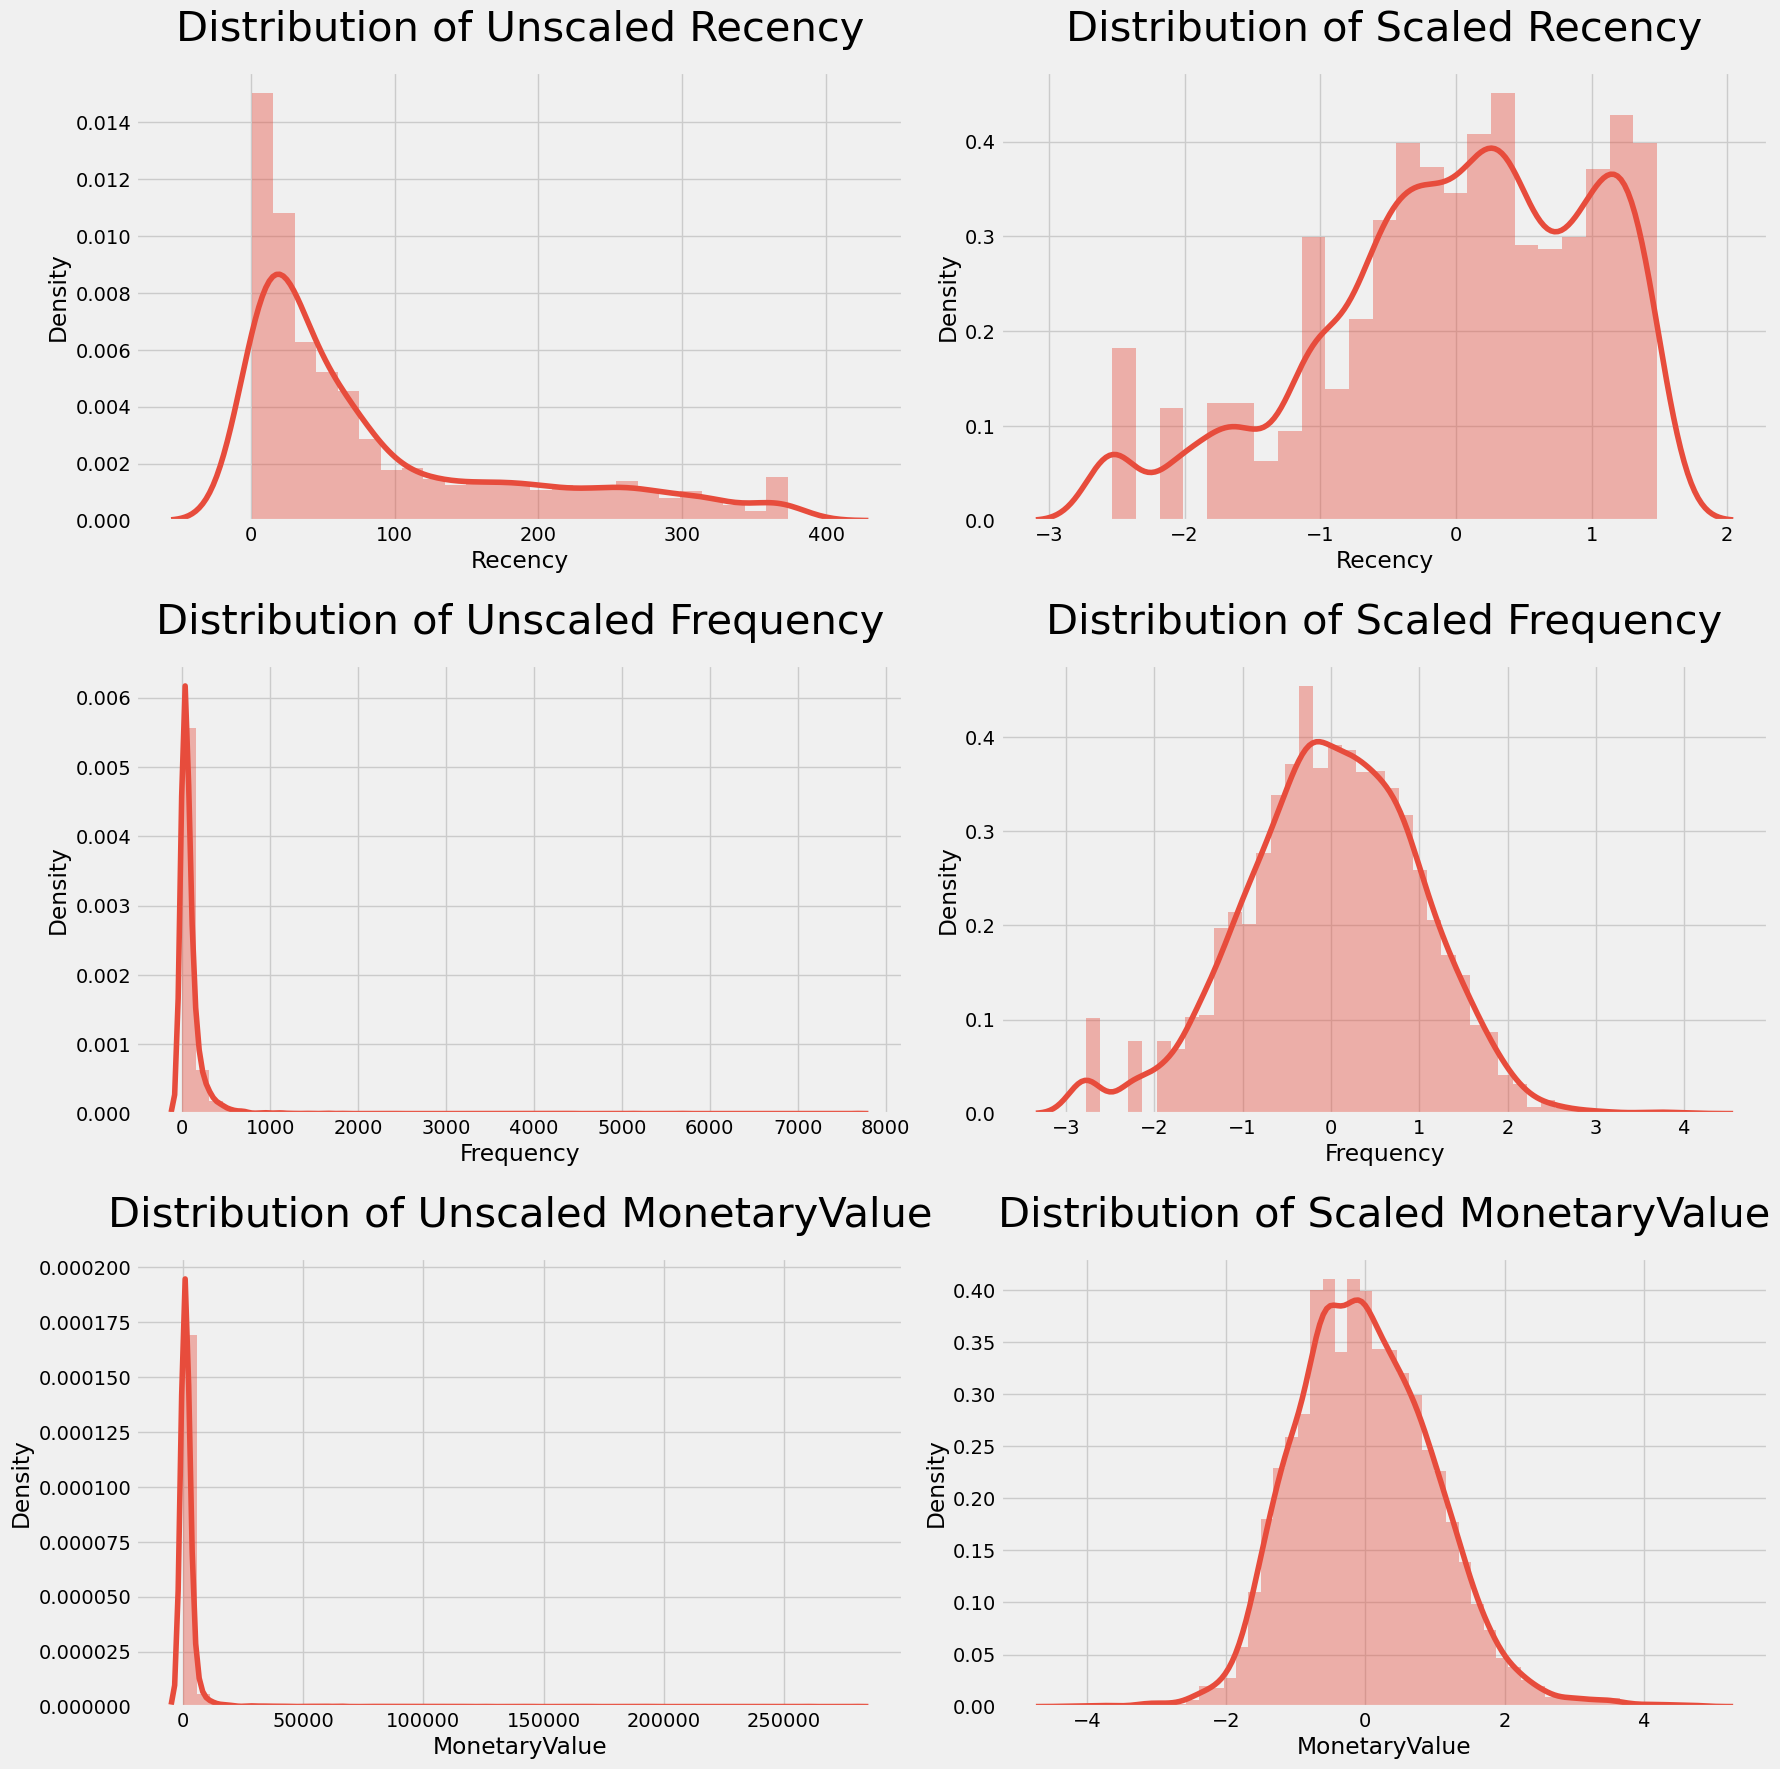

In [24]:
cont_features = ['Recency', 'Frequency', 'MonetaryValue']


fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(18,18))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cont_features):
    sns.distplot(rfm[feature],  hist=True, color='#e74c3c', ax=ax[i][0])    
    sns.distplot(rfm_scaled[feature], hist=True, color='#e74c3c', ax=ax[i][1])
    
    ax[i][0].set_title(f'Distribution of Unscaled {feature}', size=30, y=1.05)
    ax[i][1].set_title(f'Distribution of Scaled {feature}', size=30, y=1.05)
    
plt.tight_layout()      
plt.show()


C:\Users\GHOST-V3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\GHOST-V3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\GHOST-V3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\GHOST-V3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

<Figure size 1000x800 with 0 Axes>

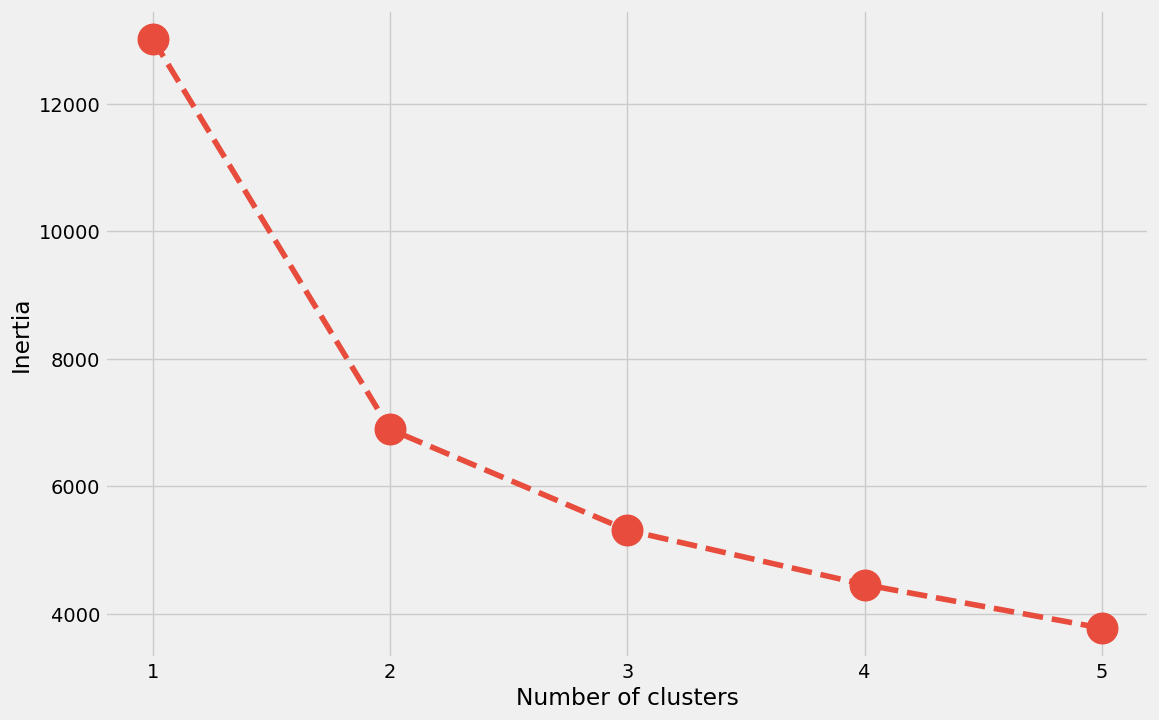

In [25]:
plt.figure(figsize=(10,8))

kls = np.arange(1,6,1)
inertias=[]
for k in kls :
    knc = KMeans(n_clusters=k, random_state=42)
    knc.fit(rfm_scaled)
    inertias.append(knc.inertia_)


fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(kls, inertias,'--o', markersize=22, color='#e74c3c')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(kls)
plt.show()

In [26]:
kc = KMeans(n_clusters=3, random_state=42)
kc.fit(rfm_normalized)
rfm['RFM Cluster'] = kc.labels_

rfm_s=rfm.groupby('RFM Cluster').agg({'Recency': 'mean','Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count']})


rfm_s.rename(columns = {'mean' : 'Mean','count' : 'Count'},
               inplace = True)



display(rfm_s.style.background_gradient(cmap='summer_r'))

C:\Users\GHOST-V3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [27]:
rfm['RFM Cluster']=rfm['RFM Cluster'].map({0: 'K_Bronze', 1: 'K_Gold',2:'K_Silver'})
rfm.sample(10)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Robust RFM Level,RFM Cluster
CustomerID,,,,,,,,,,
15181.0,66,16,689.48,2,1,2,2.01.02.0,5,Bronze,K_Gold
17674.0,74,27,551.04,2,2,2,2.02.02.0,6,Silver,K_Gold
18136.0,63,38,784.33,2,2,2,2.02.02.0,6,Silver,K_Gold
12787.0,9,20,463.66,3,1,2,3.01.02.0,6,Silver,K_Gold
14515.0,17,98,2076.89,3,3,3,3.03.03.0,9,Gold,K_Silver
13611.0,89,72,1154.40,2,2,2,2.02.02.0,6,Silver,K_Gold
12749.0,3,199,4090.88,3,3,3,3.03.03.0,9,Gold,K_Silver
14655.0,8,49,1932.23,3,2,3,3.02.03.0,8,Gold,K_Silver
13617.0,40,44,544.18,2,2,2,2.02.02.0,6,Silver,K_Gold


In [28]:
rfm_scaled['RFM Cluster'] = kc.labels_
rfm_scaled['Robust RFM Level'] = rfm['Robust RFM Level']
rfm_scaled.reset_index(inplace = True)
rfm_scaled['RFM Cluster']=rfm_scaled['RFM Cluster'].map({0: 'K_Bronze', 1: 'K_Gold',2:'K_Silver'})


rfm_melted = pd.melt(frame= rfm_scaled, id_vars= ['CustomerID', 'Robust RFM Level',
                                                  'RFM Cluster'], var_name = 'Metrics', value_name = 'Value')

rfm_melted.head()

,CustomerID,Robust RFM Level,RFM Cluster,Metrics,Value
0,12346.0,Bronze,K_Gold,Recency,1.388122
1,12347.0,Gold,K_Silver,Recency,-2.064513
2,12348.0,Silver,K_Gold,Recency,0.393612
3,12349.0,Gold,K_Gold,Recency,-0.574296
4,12350.0,Bronze,K_Bronze,Recency,1.356073
